# Image Enhancement

has three main <b>objectives </b>:
* To remove noise from the image
- Make the image visually appealing
+ To make the part of image visually appealing

fall into two <b>categories</b>: 
+ Spatial domain operation: <br>
<pre> In which we process pixel values directly
+ Frequency Domain Operation:
<pre> We process the signal frequencies present in the image. <br>
Example:
Discreate Fourier Transposisition
Wavelet

## Spatial Domain Operation:
### Image Enhancement:

#### Point Operation:
<pre>  Process one pixel at a time.<br></pre>
Most famous <b>point transformation</b> are following:<br>
- Identity Transformation
- Image Negative
- log
- power law
- Contrast stretching/ Slicing Transformation
- Bit plan slicing

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
img = cv.imread('resources/2.jpg')

In [3]:
print(img.shape)
M = img.shape[0]*0.1
N = img.shape[1]*0.1

(4608, 3456, 3)


In [4]:
img1 = cv.resize(img, (int(N), int(M)))

In [5]:
cv.imshow("Original-resized", img1)
cv.waitKey(0)
cv.destroyAllWindows()

In [6]:
gray_img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
cv.imshow('Gray Image', gray_img1)
cv.waitKey(0)
cv.destroyAllWindows()

#### Identity Transformation:
<pre> S = 1.r

In [7]:
S_identity_gray_img1 = gray_img1 * 1

In [8]:
cv.imshow('Identity Transformed Image', S_identity_gray_img1)
cv.waitKey(0)
cv.destroyAllWindows()

#### Image Negative Transformation:
<pre> S = 255 - r <br>
(Invert for 8-bit image, light to dark and vice versa)

In [9]:
S_negative_gray_img1 = 255 - gray_img1

In [10]:
cv.imshow('Gray Image', gray_img1)
cv.imshow('Negative Transformed Image', S_negative_gray_img1)
cv.waitKey(0)
cv.destroyAllWindows()

#### Thrisholding Transformation:
<pre> S = {255; r > T <br></pre>
         {0; r <= T

In [11]:
T = 50
S_thrisholding_gray_img1 = gray_img1.copy()
S_thrisholding_gray_img1[S_thrisholding_gray_img1 > T] = 255
S_thrisholding_gray_img1[S_thrisholding_gray_img1 <= T] = 0

In [14]:
cv.imshow('Gray Image', gray_img1)
cv.imshow('Thrisholding Transformed Image', S_thrisholding_gray_img1)
cv.waitKey(0)
cv.destroyAllWindows()

#### Log Transformation:

In [32]:
# c = 255
# rgb_array = img1.copy()
# red_array, green_array, blue_array = np.split(rgb_array, 3, axis=2)

# red_array_2D = red_array.reshape((int(M), int(N)))
# green_array_2D = green_array.reshape((int(M), int(N)))
# blue_array_2D = blue_array.reshape((int(M), int(N)))


# img1_1 = (c * (np.log2(1 + red_array_2D))).astype('uint8')
# img1_2 = (c * (np.log2(1 + green_array_2D))).astype('uint8')
# img1_3 = (c * (np.log2(1 + blue_array_2D))).astype('uint8')
# emphasized_blue_monet = np.stack([img1_1, img1_2, img1_3], axis=2)

In [15]:
gray_img1

array([[48, 57, 59, ..., 72, 69, 66],
       [51, 57, 57, ..., 66, 63, 64],
       [55, 55, 55, ..., 67, 68, 67],
       ...,
       [ 3,  3,  3, ...,  6,  3,  2],
       [ 4,  4,  6, ...,  3,  3,  4],
       [ 3,  4,  1, ...,  3,  1,  3]], dtype=uint8)

In [16]:
c = 255
r = gray_img1.copy()
r = r/255
S_thrisholding_gray_img1 = (c * np.log2(1+r)).astype('uint8')

In [17]:
cv.imshow('Gray Image', gray_img1)
cv.imshow('Log Transformed Image', S_thrisholding_gray_img1)
# cv.imshow('Log Transformed Image', emphasized_blue_monet)
cv.waitKey(0)
cv.destroyAllWindows()

In [18]:
gray_img1

array([[48, 57, 59, ..., 72, 69, 66],
       [51, 57, 57, ..., 66, 63, 64],
       [55, 55, 55, ..., 67, 68, 67],
       ...,
       [ 3,  3,  3, ...,  6,  3,  2],
       [ 4,  4,  6, ...,  3,  3,  4],
       [ 3,  4,  1, ...,  3,  1,  3]], dtype=uint8)

#### Power law Transformation:

In [21]:
c = 255
gamma = 2.5
r = gray_img1.copy()
r = r/255
S_power_law_gray_img1 = (c * (r ** gamma)).astype('uint8')

In [23]:
cv.imshow('Gray Image', gray_img1)
cv.imshow('Power law Transformed Image', S_power_law_gray_img1)
# cv.imshow('Log Transformed Image', emphasized_blue_monet)
cv.waitKey(0)
cv.destroyAllWindows()

#### Contrast Stretching Transformation:

In [62]:
new_img1 = gray_img1.copy()

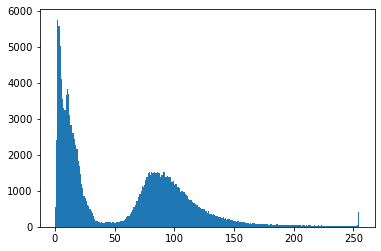

In [63]:
plt.hist(new_img1.flatten(), bins=256)
plt.show()

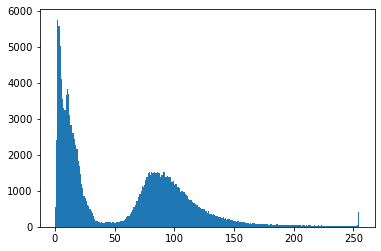

In [64]:
plt.hist(gray_img1.flatten(), bins=256)
plt.show()

In [65]:
c = 50
d = 255
a = 0 
b = 255

In [66]:
# r = new_img1/255
s = ((new_img1 - c) * ((b-a)/(d-c)) + a).astype('uint8')

In [67]:
new_img1

array([[48, 57, 59, ..., 72, 69, 66],
       [51, 57, 57, ..., 66, 63, 64],
       [55, 55, 55, ..., 67, 68, 67],
       ...,
       [ 3,  3,  3, ...,  6,  3,  2],
       [ 4,  4,  6, ...,  3,  3,  4],
       [ 3,  4,  1, ...,  3,  1,  3]], dtype=uint8)

In [68]:
s

array([[59,  8, 11, ..., 27, 23, 19],
       [ 1,  8,  8, ..., 19, 16, 17],
       [ 6,  6,  6, ..., 21, 22, 21],
       ...,
       [ 3,  3,  3, ...,  7,  3,  2],
       [ 5,  5,  7, ...,  3,  3,  5],
       [ 3,  5,  1, ...,  3,  1,  3]], dtype=uint8)

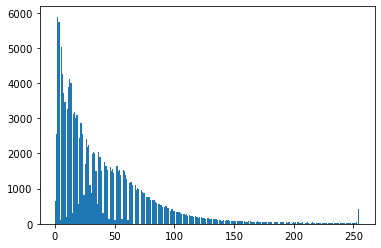

In [69]:
plt.hist(s.flatten(), bins=256)
plt.show()

In [70]:
cv.imshow('Gray Image', gray_img1)
cv.imshow('contrast streched Transformed Image', s)
# cv.imshow('Log Transformed Image', emphasized_blue_monet)
cv.waitKey(0)
cv.destroyAllWindows()

In [71]:
gray_img1

array([[48, 57, 59, ..., 72, 69, 66],
       [51, 57, 57, ..., 66, 63, 64],
       [55, 55, 55, ..., 67, 68, 67],
       ...,
       [ 3,  3,  3, ...,  6,  3,  2],
       [ 4,  4,  6, ...,  3,  3,  4],
       [ 3,  4,  1, ...,  3,  1,  3]], dtype=uint8)

In [72]:
s

array([[59,  8, 11, ..., 27, 23, 19],
       [ 1,  8,  8, ..., 19, 16, 17],
       [ 6,  6,  6, ..., 21, 22, 21],
       ...,
       [ 3,  3,  3, ...,  7,  3,  2],
       [ 5,  5,  7, ...,  3,  3,  5],
       [ 3,  5,  1, ...,  3,  1,  3]], dtype=uint8)

#### Contrast Slicing Transformation:

In [73]:
c = 100
d = 200
T = 150

In [74]:
S_contrast_slicing_gray_img1 = gray_img1.copy()
S_contrast_slicing_gray_img1[(S_contrast_slicing_gray_img1 > c) & (S_contrast_slicing_gray_img1 < d)] = T

In [75]:
cv.imshow('Gray Image', gray_img1)
cv.imshow('contrast slice Transformed Image', S_contrast_slicing_gray_img1)
# cv.imshow('Log Transformed Image', emphasized_blue_monet)
cv.waitKey(0)
cv.destroyAllWindows()

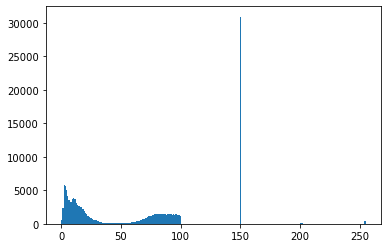

In [76]:
plt.hist(S_contrast_slicing_gray_img1.flatten(), bins=256)
plt.show()

In [77]:
S_contrast_slicing_gray_img1 = gray_img1.copy()
S_contrast_slicing_gray_img1[(S_contrast_slicing_gray_img1 > c) & (S_contrast_slicing_gray_img1 < d)] = T
x = ((S_contrast_slicing_gray_img1 > c) & (S_contrast_slicing_gray_img1 < d))
S_contrast_slicing_gray_img1[~x] = 0

In [78]:
cv.imshow('Gray Image', gray_img1)
cv.imshow('contrast slice Transformed Image', S_contrast_slicing_gray_img1)
# cv.imshow('Log Transformed Image', emphasized_blue_monet)
cv.waitKey(0)
cv.destroyAllWindows()

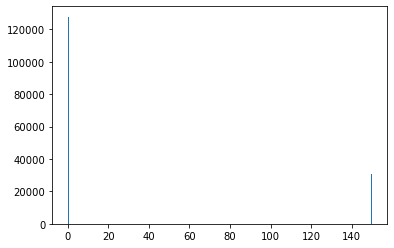

In [79]:
plt.hist(S_contrast_slicing_gray_img1.flatten(), bins=256)
plt.show()

### Histogram Equalization

#### CDF in discreate space

In [80]:
gray_img1

array([[48, 57, 59, ..., 72, 69, 66],
       [51, 57, 57, ..., 66, 63, 64],
       [55, 55, 55, ..., 67, 68, 67],
       ...,
       [ 3,  3,  3, ...,  6,  3,  2],
       [ 4,  4,  6, ...,  3,  3,  4],
       [ 3,  4,  1, ...,  3,  1,  3]], dtype=uint8)

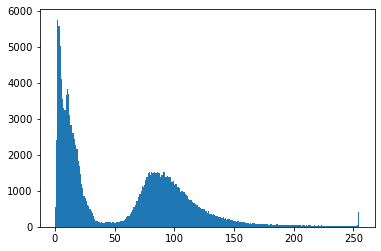

In [81]:
plt.hist(gray_img1.flatten(), bins=256)
plt.show()

In [82]:
cv.imshow('Gray Image', gray_img1)
cv.waitKey(0)
cv.destroyAllWindows()

In [83]:
r = np.arange(0,256)

In [84]:
r

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [85]:
x = gray_img1.flatten()

In [86]:
n_r = np.bincount(x)

In [87]:
n_r

array([ 549, 2420, 5762, 5596, 5035, 4109, 3561, 3312, 3252, 3667, 3839,
       3701, 3114, 2833, 2622, 2616, 2446, 2265, 2158, 1840, 1687, 1477,
       1189, 1083,  867,  806,  726,  615,  571,  504,  442,  371,  301,
        220,  160,  148,  144,  127,  109,  122,  116,  118,  140,  127,
        125,  130,  124,  117,  124,  120,  104,  120,  124,  144,  122,
        150,  160,  163,  192,  229,  274,  307,  312,  355,  398,  472,
        554,  602,  715,  723,  828,  922, 1006, 1145, 1115, 1174, 1314,
       1389, 1497, 1528, 1454, 1516, 1499, 1530, 1487, 1495, 1517, 1489,
       1389, 1433, 1442, 1536, 1512, 1383, 1406, 1379, 1391, 1385, 1250,
       1284, 1169, 1181, 1195, 1102, 1091,  971, 1010,  989,  961,  908,
        871,  866,  766,  751,  753,  687,  665,  666,  624,  602,  560,
        548,  526,  483,  483,  502,  442,  448,  375,  429,  367,  356,
        328,  344,  326,  311,  288,  269,  261,  278,  235,  263,  213,
        231,  195,  211,  206,  178,  198,  183,  1

In [88]:
n_r.sum()

158700

In [89]:
p_r = n_r / n_r.sum()

In [90]:
p_r

array([3.45935728e-03, 1.52488973e-02, 3.63074984e-02, 3.52614997e-02,
       3.17265280e-02, 2.58916194e-02, 2.24385633e-02, 2.08695652e-02,
       2.04914934e-02, 2.31064902e-02, 2.41902962e-02, 2.33207309e-02,
       1.96219282e-02, 1.78512917e-02, 1.65217391e-02, 1.64839319e-02,
       1.54127284e-02, 1.42722117e-02, 1.35979836e-02, 1.15942029e-02,
       1.06301197e-02, 9.30686830e-03, 7.49212350e-03, 6.82419660e-03,
       5.46313800e-03, 5.07876497e-03, 4.57466919e-03, 3.87523629e-03,
       3.59798362e-03, 3.17580340e-03, 2.78512917e-03, 2.33774417e-03,
       1.89666037e-03, 1.38626339e-03, 1.00819156e-03, 9.32577190e-04,
       9.07372401e-04, 8.00252048e-04, 6.86830498e-04, 7.68746062e-04,
       7.30938878e-04, 7.43541273e-04, 8.82167612e-04, 8.00252048e-04,
       7.87649653e-04, 8.19155640e-04, 7.81348456e-04, 7.37240076e-04,
       7.81348456e-04, 7.56143667e-04, 6.55324512e-04, 7.56143667e-04,
       7.81348456e-04, 9.07372401e-04, 7.68746062e-04, 9.45179584e-04,
      

In [91]:
c_p_r = p_r.cumsum()

In [92]:
c_p_r

array([0.00345936, 0.01870825, 0.05501575, 0.09027725, 0.12200378,
       0.1478954 , 0.17033396, 0.19120353, 0.21169502, 0.23480151,
       0.25899181, 0.28231254, 0.30193447, 0.31978576, 0.3363075 ,
       0.35279143, 0.36820416, 0.38247637, 0.39607435, 0.40766856,
       0.41829868, 0.42760555, 0.43509767, 0.44192187, 0.447385  ,
       0.45246377, 0.45703844, 0.46091367, 0.46451166, 0.46768746,
       0.47047259, 0.47281033, 0.47470699, 0.47609326, 0.47710145,
       0.47803403, 0.4789414 , 0.47974165, 0.48042848, 0.48119723,
       0.48192817, 0.48267171, 0.48355388, 0.48435413, 0.48514178,
       0.48596093, 0.48674228, 0.48747952, 0.48826087, 0.48901701,
       0.48967234, 0.49042848, 0.49120983, 0.4921172 , 0.49288595,
       0.49383113, 0.49483932, 0.49586641, 0.49707624, 0.49851922,
       0.50024575, 0.50218021, 0.50414619, 0.50638311, 0.50889099,
       0.51186515, 0.51535602, 0.51914934, 0.52365469, 0.52821046,
       0.53342785, 0.53923756, 0.54557656, 0.55279143, 0.55981

In [93]:
cdf = 255 * c_p_r

In [94]:
cdf

array([  0.88213611,   4.77060491,  14.02901701,  23.02069943,
        31.11096408,  37.71332703,  43.43516068,  48.75689981,
        53.98223062,  59.87438563,  66.04291115,  71.98969754,
        76.99328922,  81.54536862,  85.7584121 ,  89.96181474,
        93.89206049,  97.53147448, 100.9989603 , 103.95548204,
       106.66616257, 109.03941399, 110.94990548, 112.69007561,
       114.0831758 , 115.37826087, 116.54480151, 117.53298677,
       118.45047259, 119.26030246, 119.9705104 , 120.56663516,
       121.05028355, 121.40378072, 121.66086957, 121.89867675,
       122.13005671, 122.33412098, 122.50926276, 122.70529301,
       122.89168242, 123.08128544, 123.30623819, 123.51030246,
       123.71115312, 123.92003781, 124.11928166, 124.30727788,
       124.50652174, 124.69933837, 124.86644612, 125.05926276,
       125.25850662, 125.48988658, 125.68591682, 125.92693762,
       126.18402647, 126.44593573, 126.75444234, 127.12240076,
       127.56266541, 128.05595463, 128.55727788, 129.12

In [95]:
cdf = cdf.astype('uint16')

In [96]:
n = dict(zip(r, cdf))

In [97]:
n

{0: 0,
 1: 4,
 2: 14,
 3: 23,
 4: 31,
 5: 37,
 6: 43,
 7: 48,
 8: 53,
 9: 59,
 10: 66,
 11: 71,
 12: 76,
 13: 81,
 14: 85,
 15: 89,
 16: 93,
 17: 97,
 18: 100,
 19: 103,
 20: 106,
 21: 109,
 22: 110,
 23: 112,
 24: 114,
 25: 115,
 26: 116,
 27: 117,
 28: 118,
 29: 119,
 30: 119,
 31: 120,
 32: 121,
 33: 121,
 34: 121,
 35: 121,
 36: 122,
 37: 122,
 38: 122,
 39: 122,
 40: 122,
 41: 123,
 42: 123,
 43: 123,
 44: 123,
 45: 123,
 46: 124,
 47: 124,
 48: 124,
 49: 124,
 50: 124,
 51: 125,
 52: 125,
 53: 125,
 54: 125,
 55: 125,
 56: 126,
 57: 126,
 58: 126,
 59: 127,
 60: 127,
 61: 128,
 62: 128,
 63: 129,
 64: 129,
 65: 130,
 66: 131,
 67: 132,
 68: 133,
 69: 134,
 70: 136,
 71: 137,
 72: 139,
 73: 140,
 74: 142,
 75: 144,
 76: 146,
 77: 148,
 78: 151,
 79: 153,
 80: 156,
 81: 158,
 82: 161,
 83: 163,
 84: 165,
 85: 168,
 86: 170,
 87: 173,
 88: 175,
 89: 177,
 90: 179,
 91: 182,
 92: 184,
 93: 187,
 94: 189,
 95: 191,
 96: 193,
 97: 196,
 98: 198,
 99: 200,
 100: 201,
 101: 203,
 102: 20

In [98]:
new_img = gray_img1.copy()

In [99]:
for k, v in n.items():
    new_img[new_img == k] = v

In [100]:
new_img

array([[254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       ...,
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254]], dtype=uint8)

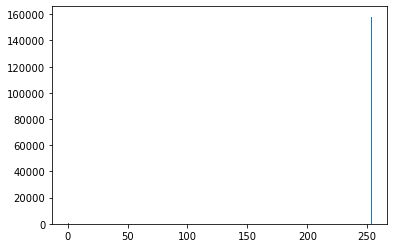

In [101]:
plt.hist(new_img.flatten(), bins=256)
plt.show()

In [102]:
cv.imshow('Gray Image', gray_img1)
cv.imshow('New Image', new_img)
cv.waitKey(0)
cv.destroyAllWindows()